<a href="https://colab.research.google.com/github/not-rudy/Applied-Computational-Methods/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rudy Medrano**

**MAT 421: Applied Computational Methods**


**Estimating Missing Temperature Values Using Interpolation and Regression Methods**

**Introduction:**

In recent years, climate change has become one of the most pressing issues facing the world. Being able to accurately track temperature anomalies is essential in understanding the effects of global warming and predicting future trends. Having readily available temperature datasets provides an excellent opportunity to apply numerical methods to analyze the changes over time. The focus of this project is to use numerical interpolation and regression techniques to estimate missing data points and reveal long-term trands in the change of Earth's temperature.

The dataset being used in this project is based on the new high-resolution Berkeley Earth global temperature data set. This dataset consolidates land and ocean temperature anomalies from January 1850 through January 2023. The anomalies in this dataset are reported relative to the average global surface temperature between 1951 and 1980. The approach on this project includes the following four techniques: Linear Polynomial Interpolation, Polynomial Regression Interpolation, Cubic Spline Interpolation, and the plotting of the raw dataset to highlight the overall trend.

Each numerical method was used to evaluate the temperature anomaly spanning the whole dataset, identifying patterns, and highlighting the data behavior. This was done so by establishing the original data and comparing to missing entries. The project will intentionally avoid Lagrange Interpolation as explained in the following section. The primary goal of this project is to apply learned numerical methods in a practical real-world setting using known data. This will be beneficial in both visualizing and predicting temperature anomaly behavior with time.

**Mathematical Methods:**

The following mathematical methods were used: Linear Polynomial Interpolation, Polynomial Regression Interpolation, and Cubic Spline Interpolation.

**Linear Polynomial Interpolation:**
Linear Polynomial Interpolation estimates a value betweeen two known data points by fitting a straight line between them. The following is the general form of the interpolation between two points $(x_0,y_0)$ and $(x_1,y_1)$:

**$y(x) = (y_0) + (x-x_0)(\frac{y_1-y_0}{x_1-x_0})$**

Linear Polynomial Interpoaltion is rather straightforward and does not use a lot of resources when computing. It's normally used when data points are densely packed and the local behavior is approximately linear. This method was used in this experiment to estimate anomalies in years with a small numberr of missing entries where data seemed noisy but appeared predictable.

**Polynomial Regression Interpolation:** Polynomial Regression Interpolation fits a polynomial of degree *n* to a dataset using the least squares method. The general form of a polynomial for this interpolation method is:

**$y = a_0 + a_1x + a_2x^2 + ... + a_nx^n$**

Using this regression method, the coefficients $a_i$ are determined such that the error betweeen the polynomial and the actual data is minimized. In comparison to Linear Polynomial Interpolation, Polynomial Regression considered a larger sample and results in a smoothed curve. This method is mainly used when datasets exhibit nonlinear trends, which is the case in the dataset for this experiment.

**Cubic Spline Interpolation:** Cubic Spline Interpolation constructs a smooth piecewise polynomial between data points. The general form of a polynomial for this interpolation method is:

**$S_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3$**

The spline ensures that the function is continuous across all intervals. This method is well suited for larger datasets because it smoothens data while maintaining accuracy and avoiding large oscillations present in high-degree polynomials.

**Lagrange Interpolation:** Lagrange Interpolation can produce accurate results when used on small datasets but it becomes impractical when analyzing larger datasets like the climate dataset used. This method constructs a single polynomial of degree $n-1$ that passes through all *n* data points. This often leads to the Runge Phenomenon which causes large oscillations at the boundaries. Due to the shear size of this dataset, a Lagrange Polynomial would be unstable and computationally inefficient. Lagrange Interpolation also lacks local control, which would result in changing a single data point affecting the entire polynomial.

**Implementation:**

In this section, my analysis of the dataset and corresponding code will be inserted. The three interpolation methods are applied and plotted to the Berkeley Earth dataset.

**General Trend**

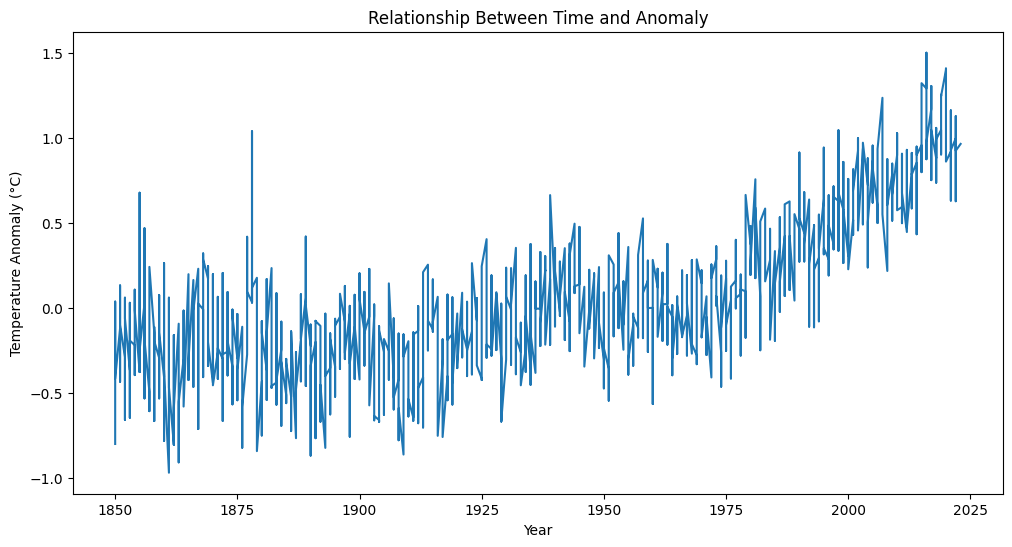

In [ ]:
## Plotting the Relationship between Time and Anomaly

## Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Initialize Data
data = pd.read_csv("/content/Global Temperatures.csv")

Anomaly = data['Month Anomaly'] # Temperature Anomaly
Years = data['Year'] # Year

## Plotting Relationship Between Month and Anomaly
plt.figure(figsize=(12, 6))
plt.plot(Years, Anomaly, label ="Original Data")
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.title('Relationship Between Time and Anomaly')
plt.show()

As seen above, the Anomaly seems to increase with time. This demonstrates that in comparison to 1850, the climate seems to be getting warmer and warmer as the years go by. This can be simply due to a variety of factors. Climate Change and Global Warming seem to be the main contributors to the increasing Anomaly.

**Removing Data and Implimenting Interpolation Techniques**

To properly measure the accuracy of the different interpolation methods, I will randomly remove 10% of the data from the dataset. I will then impliment the desired interpolation method to estimate the missing values. To evaluate the performance of each interpolation technique, I compared the interpolated values to the true values using the Mean Squared Error (MSE) metric.

Initially, the plan was to impliment **Lagrange Polynomial Interpolation** techniques to analyze the data. However, during the preparation phase, it became clear that Lagrange Interpolation is not well-suited for larger datasets like the one used here. The following reasons are below:

**Lagrange Interpolation Unfit for Larger Datasets**

Lagrange Polynomial Interpolation is generally not recommended for large datasets due to issues related to computational complexity, numerical instability, and memory usage.

Given these challenges, it was necessary to choose a more practical interpolation method for this project. Instead of Lagrange Interpolation, I decided to use Linear Polynomial Interpolation, along with other techniques such as Polynomial Regression, and Cubic Spline Interpolation, which are far better suited for larger datasets.

**Linear Polynomial Interpolation**

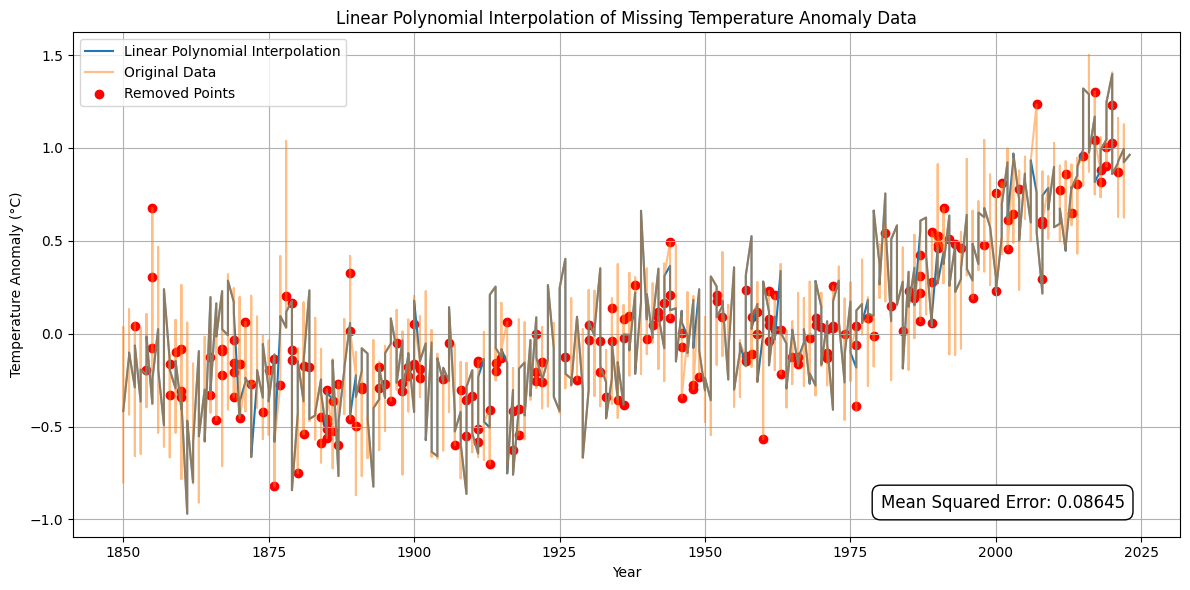

In [9]:
## Linear Polynomial Interpolation

# Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/Global Temperatures.csv")

# Extract relevant columns
Anomaly = data['Month Anomaly'].copy()
Year = data['Year']

# Randomly remove 10% of the data
np.random.seed(42)
missing_indices = np.random.choice(len(Anomaly), size=int(0.10 * len(Anomaly)), replace=False)
Anomaly_missing = Anomaly.copy()
Anomaly_missing.iloc[missing_indices] = np.nan  # Correctly set missing values

# Linear Polynomial Interpolation
valid = ~Anomaly_missing.isna()  # Boolean array for non-missing data
x_valid = Year[valid]
y_valid = Anomaly_missing[valid]

# Perform linear interpolation using interp1d
linear_interp = interp1d(x_valid, y_valid, kind='linear')

# Interpolating missing values
Anomaly_interp = Anomaly_missing.copy()
Anomaly_interp.iloc[missing_indices] = linear_interp(Year[missing_indices])

# Calculate the Mean Squared Error
mse = mean_squared_error(Anomaly.iloc[missing_indices], Anomaly_interp.iloc[missing_indices])

# Plot Results
plt.figure(figsize=(12, 6))

# Plot the linear interpolation
x_new = np.arange(Year.min(), Year.max(), 0.001)  # Smaller increment for smoother curves
plt.plot(x_new, linear_interp(x_new), label="Linear Polynomial Interpolation", linestyle="-")

# Plot original and missing data
plt.plot(Year, Anomaly, label="Original Data", alpha=0.5)
plt.scatter(Year[missing_indices], Anomaly[missing_indices], color='red', label="Removed Points")

# Display MSE on the plot
plt.text(0.95, 0.05, f'Mean Squared Error: {mse:.5f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Labeling the plot
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Linear Polynomial Interpolation of Missing Temperature Anomaly Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using simple linear interpolation between valid data points, I obtained a Mean Squared Error (MSE) of 0.08645. This suggests that linear interpolation does reasonably well at estimating missing data, but do to its simplicity of connecting points with straight lines, it may miss the natural curvature present in the global temperature trend.

**Cubic Spline Interpolation**

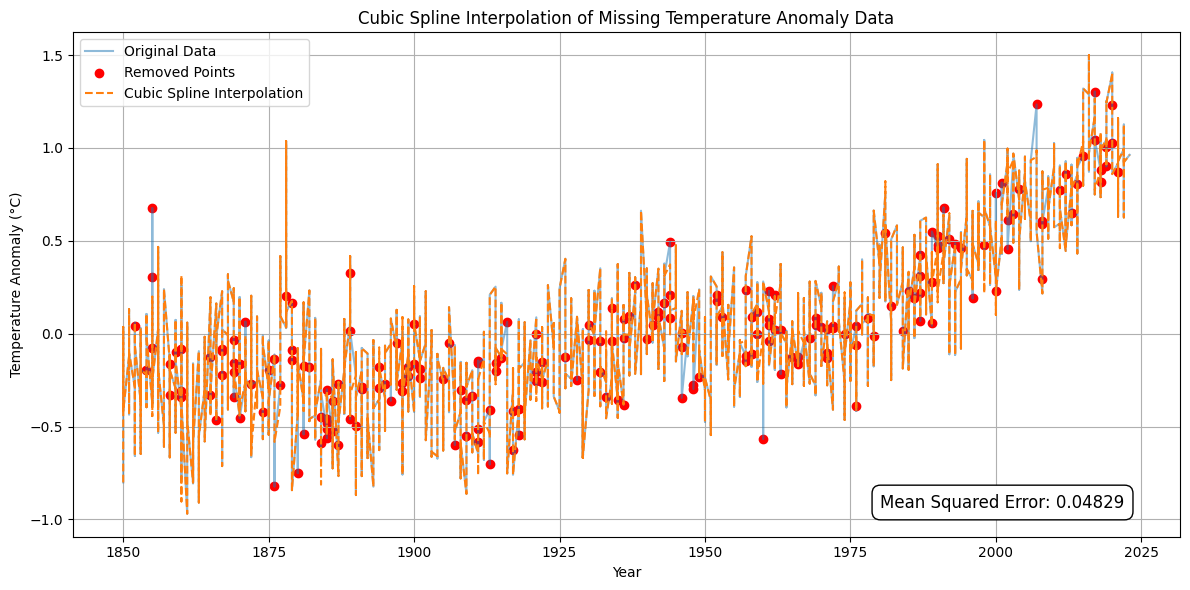

In [15]:
## Using Cubic Spline Interpolation

# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/Global Temperatures.csv")

# Extract relevant columns
Month = data['Month'].to_numpy()  # Already numerical: 1 to 2077
Anomaly = data['Month Anomaly'].copy()
Years = data['Year']

# Randomly remove 10% of the data
np.random.seed(42)
missing_indices = np.random.choice(len(Anomaly), size=int(0.10 * len(Anomaly)), replace=False)
Anomaly_missing = Anomaly.copy()
Anomaly_missing.iloc[missing_indices] = np.nan

# Interpolation using Cubic Spline (based on valid points only)
valid = ~Anomaly_missing.isna()
cs_interp = CubicSpline(Month[valid], Anomaly_missing[valid])

# Fill in missing values
Anomaly_interp = Anomaly_missing.copy()
Anomaly_interp.iloc[missing_indices] = cs_interp(Month[missing_indices])

# Evaluate interpolation error only on the missing values
mse = mean_squared_error(Anomaly[missing_indices], Anomaly_interp[missing_indices])

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(Years, Anomaly, label="Original Data", alpha=0.5)
plt.scatter(Years[missing_indices], Anomaly[missing_indices], color='red', label="Removed Points")
plt.plot(Years, Anomaly_interp, label="Cubic Spline Interpolation", linestyle="--")
plt.text(0.95, 0.05, f'Mean Squared Error: {mse:.5f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Cubic Spline Interpolation of Missing Temperature Anomaly Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Cubic Spline interpolation resulted in a much smoother curve across the missing points with an MSE of 0.04829. This significant improvement reflects the ability of cubic splines to better capture the natural non-linear variation of temperature anomaly data. It does so without heavily overfitting between points.

**Polynomial Regression**

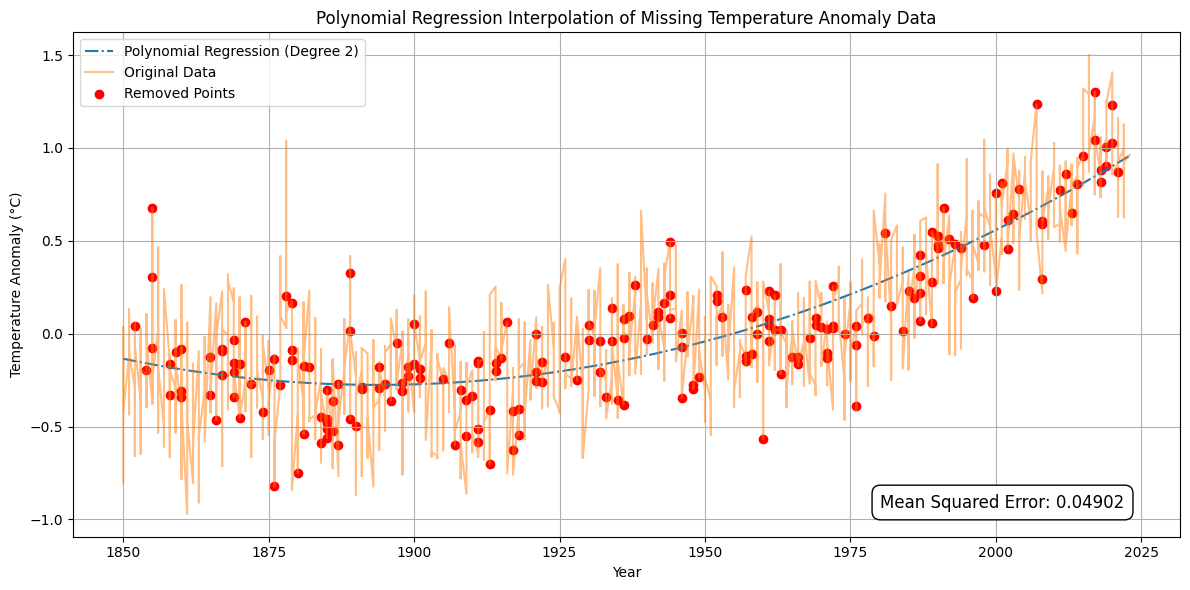

In [20]:
## Polynomial Regression Model

## Import the Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv("/content/Global Temperatures.csv")

# Extract relevant columns
Year = data['Year'].to_numpy()
Anomaly = data['Month Anomaly'].copy()

# Randomly remove 10% of the data
np.random.seed(42)
missing_indices = np.random.choice(len(Anomaly), size=int(0.10 * len(Anomaly)), replace=False)
Anomaly_missing = Anomaly.copy()
Anomaly_missing.iloc[missing_indices] = np.nan

## Polynomial Regression
degree = 2 ## Manually tested degree values, 2 gave the best MSE

## Select valid (non-missing) data for polynomial fitting
valid = ~Anomaly_missing.isna()
x_valid = Year[valid]
y_valid = Anomaly_missing[valid]

## Fit a polynomial regression model
coefficients = np.polyfit(x_valid, y_valid, degree)
poly_model = np.poly1d(coefficients)

## Predict missing values using the polynomial model
x_interp = Year[missing_indices]
Anomaly_interp = Anomaly_missing.copy()
Anomaly_interp.iloc[missing_indices] = poly_model(x_interp)

## Calculate the Mean Squared Error for the interpolation
mse = mean_squared_error(Anomaly.iloc[missing_indices], Anomaly_interp.iloc[missing_indices])

# Plot Results
plt.figure(figsize=(12, 6))

# Plot the polynomial regression curve
x_new = np.arange(Year.min(), Year.max(), 0.01)  # Smaller increment for smoother curves
plt.plot(x_new, poly_model(x_new), label="Polynomial Regression (Degree 2)", linestyle="-.")

# Plot original and missing data
plt.plot(Year, Anomaly, label="Original Data", alpha=0.5)
plt.scatter(Year[missing_indices], Anomaly[missing_indices], color='red', label="Removed Points")

# Display MSE on the plot
plt.text(0.95, 0.05, f'Mean Squared Error: {mse:.5f}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='bottom', fontsize=12,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

# Labeling the plot
plt.xlabel("Year")
plt.ylabel("Temperature Anomaly (°C)")
plt.title("Polynomial Regression Interpolation of Missing Temperature Anomaly Data")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Using the polynomial regression model to fit the data, an MSE of 0.04902 was observed. This is very close to the result from cubic spline interpolation. This could be due to the fact that polynomial regression is flexible enough to capture the entire general trend. However, this can sometimes introduce slight overfitting because it fits the entire dataset with a single global function.

**Data:**

The dataset used for this project is publicly available and sourced from [Kaggle](https://www.kaggle.com/datasets/joebeachcapital/global-earth-temperatures). The dataset records monthly global temperature anomalies from January 1850 to January 2023. This offers one of the largest continuous temperature anomaly records available.

The dataset includes the following key columns:

Year: The Year of Observation

Month: The Month of Observation (1 to 12)

Monthly Anomaly: Temperature anomaly for that specific month (°C)

Below is the entire dataset:

In [28]:
## Displaying Data

# Necessary Libraries
import pandas as pd

# Loading dataset
data = pd.read_csv("/content/Global Temperature.csv")

# Displaying entire dataset
display(data)

,Year,Month,Monthly Anomaly,Monthly Unc.,Annual Anomaly,Annual Unc,Five-Year Anomaly,Five-Year Unc.,Ten-Year Anomaly,Ten-Year Unc.,Twenty-Year Anomaly,Twenty-year Unc.
0,1850,1,-0.801,0.482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1850,2,-0.102,0.592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1850,3,-0.119,0.819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1850,4,-0.485,0.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1850,5,-0.351,0.549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2072,2022,9,0.971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2073,2022,10,1.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2074,2022,11,0.626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2075,2022,12,0.923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
